In [1]:
import pandas as pd
import numpy as np
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

cover_column_names=["Elevation","Aspect","Slope",
              "Horizontal_Distance_To_Hydrology","Vertical_Distance_To_Hydrology",
              "Horizontal_Distance_To_Roadways","Hillshade_9am","Hillshade_Noon",
              "Hillshade_3pm","Horizontal_Distance_To_Fire_Points"]
wilderness_cols =["Wilderness_"+str(i) for i in range(4)]
soil_col =["Soil_"+str(i) for i in range(40)]
cover_columns_names = cover_column_names + wilderness_cols + soil_col

COVER_FILE = './forest_cover_dataset.csv'
forest_dataFile = pd.read_csv(COVER_FILE,names=cover_columns_names)
#Determine the number and types of features.
forest_dataFile.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 280251 entries, 0 to 280250
Data columns (total 54 columns):
 #   Column                              Non-Null Count   Dtype
---  ------                              --------------   -----
 0   Elevation                           280251 non-null  int64
 1   Aspect                              280251 non-null  int64
 2   Slope                               280251 non-null  int64
 3   Horizontal_Distance_To_Hydrology    280251 non-null  int64
 4   Vertical_Distance_To_Hydrology      280251 non-null  int64
 5   Horizontal_Distance_To_Roadways     280251 non-null  int64
 6   Hillshade_9am                       280251 non-null  int64
 7   Hillshade_Noon                      280251 non-null  int64
 8   Hillshade_3pm                       280251 non-null  int64
 9   Horizontal_Distance_To_Fire_Points  280251 non-null  int64
 10  Wilderness_0                        280251 non-null  int64
 11  Wilderness_1                        280251 non-null 

In [2]:
forest_dataFile.head()

Elevation  Aspect  Slope  Horizontal_Distance_To_Hydrology  \
0       2825     265     17                               319   
1       2719     198     34                               134   
2       3146     152     14                               212   
3       2882      18     18                                95   
4       2912     349     17                               283   

   Vertical_Distance_To_Hydrology  Horizontal_Distance_To_Roadways  \
0                             108                             2298   
1                              76                             2352   
2                              41                              940   
3                              -3                              485   
4                              57                             2729   

   Hillshade_9am  Hillshade_Noon  Hillshade_3pm  \
0            174             245            209   
1            187             245            167   
2            237             239            130   
3            203             199            128   
4            187             210            160   

   Horizontal_Distance_To_Fire_Points  ...  Soil_30  Soil_31  Soil_32  \
0                                 342  ...        0        0        1   
1                                 693  ...        0        0        0   
2                                2007  ...        0        0        0   
3                                 342  ...        1        0        0   
4                                2201  ...        0        0        0   

   Soil_33  Soil_34  Soil_35  Soil_36  Soil_37  Soil_38  Soil_39  
0        0        0        0        0        0        0        0  
1        0        0        0        0        0        0        0  
2        0        0        0        0        0        0        0  
3        0        0        0        0        0        0        0  
4        0        0        0        0        0        0        0  

[5 rows x 54 columns]

In [3]:
#Perform a ShuffleSplit of the data into training/validation/test sets, 60%/20%/20%.
from sklearn.model_selection import ShuffleSplit

def MySplit(n_splits,test_size,df):
  split = ShuffleSplit(n_splits=n_splits, test_size=test_size, random_state=23721266)
  for train_index, test_valid_index in split.split(df):
     set1 = df.iloc[train_index]
     set2 = df.iloc[test_valid_index]
     return set1,set2

train_set,test_valid_set = MySplit(1,0.4,forest_dataFile)
test_set,valid_set = MySplit(1,0.5,test_valid_set)

In [4]:
#Center the training/validation/test splits (fit on the training set, then transform the validation/test sets).
from sklearn.preprocessing import StandardScaler
center_function = lambda x: x - x.mean()
scaler = StandardScaler(with_std=False)

'''
train_set_centered = train_set.apply(center_function)
test_set_centered = test_set.apply(center_function)
valid_set_centered = valid_set.apply(center_function)
'''


scaler.fit(train_set)
'''
train_set_centered = pd.DataFrame(scaler.transform(train_set),columns = train_set.columns, index=train_set.index)
test_set_centered = pd.DataFrame(scaler.transform(test_set),columns = test_set.columns, index=test_set.index)
valid_set_centered = pd.DataFrame(scaler.transform(valid_set),columns = valid_set.columns, index=valid_set.index)
'''
train_set_centered = scaler.transform(train_set)
test_set_centered = scaler.transform(test_set)
valid_set_centered = scaler.transform(valid_set)


train_set.head()
print(train_set_centered)

'\ntrain_set_centered = train_set.apply(center_function)\ntest_set_centered = test_set.apply(center_function)\nvalid_set_centered = valid_set.apply(center_function)\n'

StandardScaler(with_std=False)

'\ntrain_set_centered = pd.DataFrame(scaler.transform(train_set),columns = train_set.columns, index=train_set.index)\ntest_set_centered = pd.DataFrame(scaler.transform(test_set),columns = test_set.columns, index=test_set.index)\nvalid_set_centered = pd.DataFrame(scaler.transform(valid_set),columns = valid_set.columns, index=valid_set.index)\n'

Elevation  Aspect  Slope  Horizontal_Distance_To_Hydrology  \
273258       3013     177     10                               361   
165570       3163      41     16                                30   
146527       3214     144     14                               270   
79044        2321     352     26                                42   
128539       2968     167     12                               256   

        Vertical_Distance_To_Hydrology  Horizontal_Distance_To_Roadways  \
273258                              56                             4992   
165570                              10                             1536   
146527                              27                             2126   
79044                               12                             1208   
128539                              49                             5419   

        Hillshade_9am  Hillshade_Noon  Hillshade_3pm  \
273258            225             246            153   
165570            221             204            115   
146527            239             237            124   
79044             165             185            152   
128539            230             244            145   

        Horizontal_Distance_To_Fire_Points  ...  Soil_30  Soil_31  Soil_32  \
273258                                1559  ...        0        0        0   
165570                                2462  ...        0        0        0   
146527                                1708  ...        0        0        0   
79044                                  277  ...        0        0        0   
128539                                2995  ...        0        0        0   

        Soil_33  Soil_34  Soil_35  Soil_36  Soil_37  Soil_38  Soil_39  
273258        0        0        0        0        0        0        0  
165570        0        0        0        0        0        0        0  
146527        0        0        0        0        0        0        0  
79044         0        0        0        0        0        0        0  
128539        0        0        0        0        0        0        0  

[5 rows x 54 columns]

[[ 6.82547904e+01  2.10118822e+01 -4.13631876e+00 ... -1.65090693e-02
  -1.45346417e-02 -9.05144216e-03]
 [ 2.18254790e+02 -1.14988118e+02  1.86368124e+00 ... -1.65090693e-02
  -1.45346417e-02 -9.05144216e-03]
 [ 2.69254790e+02 -1.19881178e+01 -1.36318763e-01 ... -1.65090693e-02
  -1.45346417e-02 -9.05144216e-03]
 ...
 [ 1.06254790e+02  1.88011882e+02  7.86368124e+00 ... -1.65090693e-02
  -1.45346417e-02 -9.05144216e-03]
 [ 2.48254790e+02  1.86011882e+02 -1.11363188e+01 ... -1.65090693e-02
  -1.45346417e-02 -9.05144216e-03]
 [ 4.41254790e+02  1.36011882e+02  8.86368124e+00 ... -1.65090693e-02
  -1.45346417e-02 -9.05144216e-03]]


In [5]:
#𝑘 -Means Clustering
'''
1. Cluster the *training* dataset using ```KMeans``` from Scikit-learn using the values 
for $k$ below. You can utilize the default implementation in Scikit-learn, which is $k$-means$++$. 
Construct models for each value of $k$ specified in the ``k_values`` array below.

'''
from sklearn.cluster import KMeans

    
k_values=list(range(2,11))+[15,20]
k_models =["k_means"+str(i) for i in k_values]

for i in range(len(k_models)):
    k_models[i] = KMeans(n_clusters=k_values[i], random_state=23721266).fit(train_set_centered) 



'\n1. Cluster the *training* dataset using ```KMeans``` from Scikit-learn using the values \nfor $k$ below. You can utilize the default implementation in Scikit-learn, which is $k$-means$++$. \nConstruct models for each value of $k$ specified in the ``k_values`` array below.\n\n'

In [6]:
#2. Apply the trained models to the validation dataset.
k_valids =["k_valid"+str(i) for i in k_values]
for i in range(len(k_models)):
    k_valids[i] = k_models[i].predict(valid_set_centered)
    print(k_valids[i])
    

[1 1 0 ... 1 1 1]
[1 1 0 ... 1 1 1]
[0 1 3 ... 0 0 1]
[3 1 0 ... 3 3 1]
[1 4 5 ... 1 1 4]
[4 5 6 ... 4 4 5]
[1 4 5 ... 1 1 4]
[5 2 8 ... 5 1 2]
[8 7 5 ... 8 3 7]
[ 0  4 10 ...  0 13  8]
[19 12  3 ... 19  2 18]


In [7]:
'''
3. Compute the **mean** inertia for each value of $k$ on the training and validation datasets. 
For the training data, you can extract the *total* (**unnormalized**) inertia from the trained models 
via their respective ```inertia_```. For the validation models, you can utilize 
the function ```total_inertia``` provided below.
'''
import matplotlib.pyplot as plt
def total_inertia(dataset,centers,labels,distance=None,mean=True):
    """
    Computes the total inertia (the intracluster variance) given a dataset and the cluster centers.
    
    Parameters
    ----------
    dataset : numpy.ndarray
        The dataset to evaluate.
    center : numpy.ndarray or list
        The list of cluster centers.
    distance : function
        A function that computes the pairwise distance between two samples.
        Default: Euclidean (l_2) distance
    mean : bool
        If True, returns the mean inertia.
        Default: True
        
    Returns
    -------
    total_inertia : float
       The mean inertia (if mean==True) or total inertia (if mean==False).
"""
    num_samples,_ = dataset.shape
    total_inertia=0
    if distance is None:
        distance=lambda x,y: np.linalg.norm(x-y)**2
    for i,sample in enumerate(dataset):
        center = centers[labels[i]]
        total_inertia += distance(sample,center)
    
    if mean:
        return total_inertia/num_samples
    else:
        return total_inertia

Train_mean_inertias = []
Valid_mean_inertias = []

numOfSamples =  len(train_set_centered)

for i in range(len(k_models)):
    Train_mean_inertias.append(k_models[i].inertia_/numOfSamples)
print(Train_mean_inertias)


for i in range(len(k_models)):
    Valid_mean_inertias.append(total_inertia(valid_set_centered,k_models[i].cluster_centers_,k_valids[i],distance=None,mean=True))
print(Valid_mean_inertias)


'\n3. Compute the **mean** inertia for each value of $k$ on the training and validation datasets. \nFor the training data, you can extract the *total* (**unnormalized**) inertia from the trained models \nvia their respective ```inertia_```. For the validation models, you can utilize \nthe function ```total_inertia``` provided below.\n'

[2341012.563974211, 1644887.354320643, 1269061.8651333533, 1008725.2982929216, 885990.8858518186, 767906.4084918541, 692909.6274348755, 631824.983437648, 578473.6472634225, 419943.9588923205, 342480.8245872137]
[2347441.5255471007, 1644260.983982393, 1275261.5399794725, 1010992.3764215778, 883945.63320195, 767808.3921918651, 690046.7293108647, 631478.3531613607, 577058.0167088571, 421606.8595340662, 344821.4319810845]


'\nPlot the mean inertias for all values of $k$ and for both the training and validation sets on a single plot. \n'

Text(0.5, 1.0, 'mean inertias')

Text(0, 0.5, 'mean inertias')

Text(0.5, 0, 'K values')

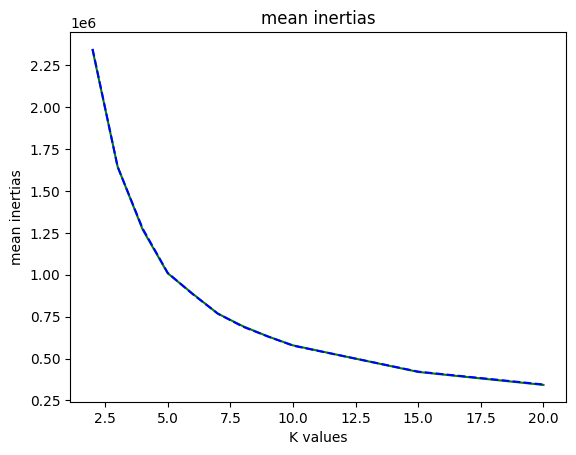

In [8]:
'''
Plot the mean inertias for all values of $k$ and for both the training and validation sets on a single plot. 
'''
plt.plot(k_values,Train_mean_inertias,'g')
plt.plot(k_values,Valid_mean_inertias,'b--')
plt.title('mean inertias')
plt.ylabel('mean inertias')
plt.xlabel('K values')



In [9]:
from sklearn.metrics import silhouette_score
'''
The *Silhouette Coefficient* is another cluster performance metric that combines intra-cluster distance with 
inter-cluster distances from clusters in close proximity to each other. 
'''
silhouette_scores = []
for v in k_valids: 
    silhouette_scores.append(silhouette_score(valid_set_centered,v,random_state=23721266)) 

'\nThe *Silhouette Coefficient* is another cluster performance metric that combines intra-cluster distance with \ninter-cluster distances from clusters in close proximity to each other. \n'

[0.46027381764253095, 0.44054393089208294, 0.33925833436572206, 0.3526244674635626, 0.34095363605198437, 0.33766819537143444, 0.3318529033475337, 0.2957271016054832, 0.29451272199627376, 0.2670074895830763, 0.2556219835464802]


Text(0.5, 1.0, 'silhouette_scores')

Text(0, 0.5, 'silhouette_scores')

Text(0.5, 0, 'K values')

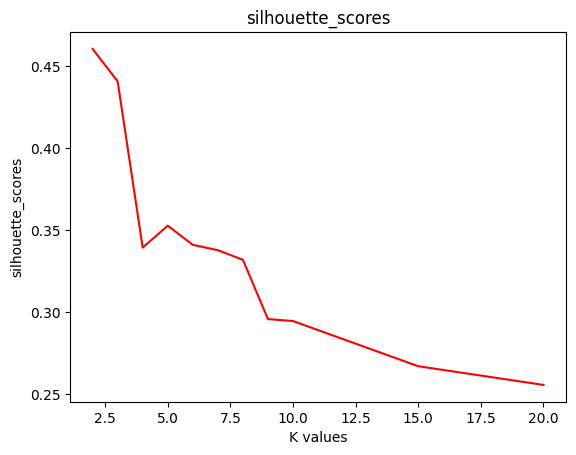

In [10]:
print(silhouette_scores)
plt.plot(k_values,silhouette_scores,'r')
plt.title('silhouette_scores')
plt.ylabel('silhouette_scores')
plt.xlabel('K values')

In [11]:
'''
Using whichever value of $k$ you think is the best based on steps 4) and 5), 
create a plot for each feature that contains 
[boxplots](https://matplotlib.org/stable/gallery/statistics/boxplot_demo.html#sphx-glr-gallery-statistics-boxplot-demo-py) 
of that feature for each cluster. Based upon these plots, 
determine which features you think are meaningful in discriminating between the clusters, 
as well as any other trends you observe.
'''

'\nUsing whichever value of $k$ you think is the best based on steps 4) and 5), \ncreate a plot for each feature that contains \n[boxplots](https://matplotlib.org/stable/gallery/statistics/boxplot_demo.html#sphx-glr-gallery-statistics-boxplot-demo-py) \nof that feature for each cluster. Based upon these plots, \ndetermine which features you think are meaningful in discriminating between the clusters, \nas well as any other trends you observe.\n'

In [31]:
#Part 2 2.1 Load Data
crime_column_names= ['state', 'county', 'community', 'communityname', 'fold', 'population', 'householdsize',
                 'racepctblack', 'racePctWhite', 'racePctAsian', 'racePctHisp', 'agePct12t21', 'agePct12t29',
                 'agePct16t24', 'agePct65up', 'numbUrban', 'pctUrban', 'medIncome', 'pctWWage', 'pctWFarmSelf',
                 'pctWInvInc', 'pctWSocSec', 'pctWPubAsst', 'pctWRetire', 'medFamInc', 'perCapInc', 'whitePerCap',
                 'blackPerCap', 'indianPerCap', 'AsianPerCap', 'OtherPerCap', 'HispPerCap', 'NumUnderPov', 'PctPopUnderPov',
                 'PctLess9thGrade', 'PctNotHSGrad', 'PctBSorMore', 'PctUnemployed', 'PctEmploy', 'PctEmplManu',
                 'PctEmplProfServ', 'PctOccupManu', 'PctOccupMgmtProf', 'MalePctDivorce', 'MalePctNevMarr',
                 'FemalePctDiv', 'TotalPctDiv', 'PersPerFam', 'PctFam2Par', 'PctKids2Par', 'PctYoungKids2Par',
                 'PctTeen2Par', 'PctWorkMomYoungKids', 'PctWorkMom', 'NumIlleg', 'PctIlleg', 'NumImmig', 'PctImmigRecent',
                 'PctImmigRec5', 'PctImmigRec8', 'PctImmigRec10', 'PctRecentImmig', 'PctRecImmig5', 'PctRecImmig8',
                 'PctRecImmig10', 'PctSpeakEnglOnly', 'PctNotSpeakEnglWell', 'PctLargHouseFam', 'PctLargHouseOccup',
                 'PersPerOccupHous', 'PersPerOwnOccHous', 'PersPerRentOccHous', 'PctPersOwnOccup', 'PctPersDenseHous',
                 'PctHousLess3BR', 'MedNumBR', 'HousVacant', 'PctHousOccup', 'PctHousOwnOcc', 'PctVacantBoarded',
                 'PctVacMore6Mos', 'MedYrHousBuilt', 'PctHousNoPhone', 'PctWOFullPlumb', 'OwnOccLowQuart', 'OwnOccMedVal',
                 'OwnOccHiQuart', 'RentLowQ', 'RentMedian', 'RentHighQ', 'MedRent', 'MedRentPctHousInc', 'MedOwnCostPctInc',
                 'MedOwnCostPctIncNoMtg', 'NumInShelters', 'NumStreet', 'PctForeignBorn', 'PctBornSameState', 'PctSameHouse85',
                 'PctSameCity85', 'PctSameState85', 'LemasSwornFT', 'LemasSwFTPerPop', 'LemasSwFTFieldOps',
                 'LemasSwFTFieldPerPop', 'LemasTotalReq', 'LemasTotReqPerPop', 'PolicReqPerOffic',
                 'PolicPerPop', 'RacialMatchCommPol', 'PctPolicWhite', 'PctPolicBlack', 'PctPolicHisp',
                 'PctPolicAsian', 'PctPolicMinor', 'OfficAssgnDrugUnits', 'NumKindsDrugsSeiz', 'PolicAveOTWorked',
                 'LandArea', 'PopDens', 'PctUsePubTrans', 'PolicCars', 'PolicOperBudg', 'LemasPctPolicOnPatr',
                 'LemasGangUnitDeploy', 'LemasPctOfficDrugUn', 'PolicBudgPerPop', 'ViolentCrimesPerPop']

CRIME_FILE = './crime.csv'
CRIME_dataFrame = pd.read_csv(CRIME_FILE,names=crime_column_names)
CRIME_dataFrame.head()

#number of features & type of features
CRIME_dataFrame.info()

state county community        communityname  fold  population  \
0      8      ?         ?         Lakewoodcity     1        0.19   
1     53      ?         ?          Tukwilacity     1        0.00   
2     24      ?         ?         Aberdeentown     1        0.00   
3     34      5     81440  Willingborotownship     1        0.04   
4     42     95      6096    Bethlehemtownship     1        0.01   

   householdsize  racepctblack  racePctWhite  racePctAsian  ...  LandArea  \
0           0.33          0.02          0.90          0.12  ...      0.12   
1           0.16          0.12          0.74          0.45  ...      0.02   
2           0.42          0.49          0.56          0.17  ...      0.01   
3           0.77          1.00          0.08          0.12  ...      0.02   
4           0.55          0.02          0.95          0.09  ...      0.04   

   PopDens  PctUsePubTrans  PolicCars  PolicOperBudg  LemasPctPolicOnPatr  \
0     0.26            0.20       0.06           0.04                  0.9   
1     0.12            0.45          ?              ?                    ?   
2     0.21            0.02          ?              ?                    ?   
3     0.39            0.28          ?              ?                    ?   
4     0.09            0.02          ?              ?                    ?   

   LemasGangUnitDeploy  LemasPctOfficDrugUn  PolicBudgPerPop  \
0                  0.5                 0.32             0.14   
1                    ?                 0.00                ?   
2                    ?                 0.00                ?   
3                    ?                 0.00                ?   
4                    ?                 0.00                ?   

   ViolentCrimesPerPop  
0                 0.20  
1                 0.67  
2                 0.43  
3                 0.12  
4                 0.03  

[5 rows x 128 columns]

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1994 entries, 0 to 1993
Columns: 128 entries, state to ViolentCrimesPerPop
dtypes: float64(100), int64(2), object(26)
memory usage: 1.9+ MB


In [36]:
from sklearn import preprocessing
from sklearn.impute import SimpleImputer
#Perform a ShuffleSplit of the data into training/validation/test sets, 60%/20%/20%.
#preprocess string features     

def labelizedString(df2):
    le = preprocessing.LabelEncoder()
    for column_name in df2.columns:
        if df2[column_name].dtype == object:
            df2[column_name] = le.fit_transform(df2[column_name])
        else:
            pass
        
CRIME_dataFrame.replace('?',np.nan,inplace=True)
imp_mean = SimpleImputer(missing_values=np.nan, strategy='mean')
labelizedString(CRIME_dataFrame)
imp_mean.fit_transform(CRIME_dataFrame)

CRIME_train_set,CRIME_test_valid_set = MySplit(1,0.4,CRIME_dataFrame)
CRIME_test_set,CRIME_valid_set = MySplit(1,0.5,CRIME_test_valid_set)

array([[8.00e+00, 1.08e+02, 7.99e+02, ..., 3.20e-01, 1.40e+01, 2.00e-01],
       [5.30e+01, 1.08e+02, 7.99e+02, ..., 0.00e+00, 5.10e+01, 6.70e-01],
       [2.40e+01, 1.08e+02, 7.99e+02, ..., 0.00e+00, 5.10e+01, 4.30e-01],
       ...,
       [9.00e+00, 1.02e+02, 7.09e+02, ..., 9.10e-01, 2.80e+01, 2.30e-01],
       [2.50e+01, 3.40e+01, 6.21e+02, ..., 2.20e-01, 1.80e+01, 1.90e-01],
       [6.00e+00, 1.08e+02, 7.99e+02, ..., 1.00e+00, 1.30e+01, 4.80e-01]])

In [49]:
#Split the non-test data (training + validation data) into 5 folds for cross-validation purposes.
#Perform any necessary preprocessing on dataset
from sklearn.model_selection import KFold

CRIME_mergeDataSet = pd.concat([CRIME_train_set,CRIME_valid_set])
X_CRIME_mergeDataSet = CRIME_mergeDataSet.drop('ViolentCrimesPerPop',axis=1)
Y_CRIME_mergeDataSet = CRIME_mergeDataSet['ViolentCrimesPerPop']


Five_folds_train = []
Five_folds_test = []

kf = KFold(n_splits=5,random_state=23721266,shuffle=True)
'''
def KFoldTraining(X):
    skf = KFold(n_splits=5,random_state=23721266,shuffle=True)
    for train_index, test_index in skf.split(X):
        this_X_train, this_X_test = X.iloc[train_index], X.iloc[test_index]
        this_y_train, this_y_test = Y_CRIME_mergeDataSet.iloc[train_index], Y_CRIME_mergeDataSet.iloc[test_index]
        Five_folds.append((this_X_train, this_y_train))
        Five_folds_test.append((this_X_test,this_y_test))
        
'''
 
    
KFoldTraining(X_CRIME_mergeDataSet)
print(len(Five_folds))

'\ndef KFoldTraining(X):\n    skf = KFold(n_splits=5,random_state=23721266,shuffle=True)\n    for train_index, test_index in skf.split(X):\n        this_X_train, this_X_test = X.iloc[train_index], X.iloc[test_index]\n        this_y_train, this_y_test = Y_CRIME_mergeDataSet.iloc[train_index], Y_CRIME_mergeDataSet.iloc[test_index]\n        Five_folds.append((this_X_train, this_y_train))\n        Five_folds_test.append((this_X_test,this_y_test))\n        \n'

10


In [50]:
from sklearn.linear_model import LinearRegression
#2.2 Linear Regression
#Construct a linear model using Scikit-learn's LinearRegression method with default parameters.

#separate features and labels
Linear_X_train = CRIME_train_set.drop('ViolentCrimesPerPop',axis=1)
Linear_Y_train = CRIME_train_set['ViolentCrimesPerPop']
reg＿model = LinearRegression()


In [53]:
'''
Report the following performance metrics on the training and validation sets:
Mean Squared Error, Mean Absolute Error, and the Coefficient of Determination ( 𝑟2 ).
'''
#peformance metric functions
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
from sklearn.model_selection import cross_validate
import numpy as np

#A list of keys for the dictionary returned by p1_metrics
metric_keys = ['mse','mae','r2']

def p2_metrics(y_true,y_pred,negation=False):
    if negation:
        sign = -1
    else:
        sign = 1
    return {
        'mse': sign*mean_squared_error(y_true,y_pred),
        'mae': sign*mean_absolute_error(y_true,y_pred),
        'r2': sign*r2_score(y_true,y_pred)}

#This wrapper can be used to return multiple performance metrics during cross-validation
def p2_metrics_scorer(clf,X,y_true):
    y_pred=clf.predict(X)
    return p2_metrics(y_true,y_pred,negation=True)

def collate_cv_results(cv_results,display=True):
    cv_stats=dict()
    for k in cv_results:
        cv_stats[k+"_mean"]=np.mean(cv_results[k])
        cv_stats[k+"_std"]=np.std(cv_results[k])
        if display:
            print(k,cv_stats[k+"_mean"],"("+str(cv_stats[k+"_std"])+")")
    return cv_stats

linear_cv_results = cross_validate(reg＿model, X_CRIME_mergeDataSet,Y_CRIME_mergeDataSet, cv=kf, scoring=p2_metrics_scorer)
linea_cv_stats = collate_cv_results(linear_cv_results)


'\nReport the following performance metrics on the training and validation sets:\nMean Squared Error, Mean Absolute Error, and the Coefficient of Determination ( 𝑟2 ).\n'

fit_time 0.030458927154541016 (0.002360083517485955)
score_time 0.0021944522857666017 (0.00039873131722588704)
test_mse -0.020191048909328876 (0.001064010296902651)
test_mae -0.10097315497433886 (0.002145183523340853)
test_r2 -0.6247529998919077 (0.019305910119585563)
